# Práctica de Visión por Computadora para Robótica con scikit-image

## Objetivo

Desarrollar habilidades en procesamiento de imágenes aplicadas a robótica usando scikit-image, simulando tareas típicas que un robot necesita realizar.

## Configuración Inicial

```python
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, measure, morphology, segmentation
from skimage.color import rgb2gray, rgb2hsv
from skimage.feature import canny, corner_harris, corner_peaks
from skimage.transform import hough_line, hough_line_peaks, hough_circle
from skimage.util import random_noise
import cv2  # Para algunas funciones complementarias

## Ejercicio 1: Detección de Objetos por Color (Clasificación de Piezas)

**Escenario**: Un robot debe clasificar piezas de diferentes colores en una banda transportadora.

**Tareas**:

1. Carga una imagen con objetos de diferentes colores
2. Convierte a espacio de color HSV
3. Crea máscaras para detectar objetos rojos, azules y verdes
4. Cuenta el número de objetos de cada color
5. Calcula el centroide de cada objeto

```python
def detectar_objetos_por_color(imagen):
    """
    Detecta y clasifica objetos por color
    """

Resultados de clasificación por color:
Rojo: 4 objetos
  - Centroide 1: (np.float64(197.9333689232925), np.float64(166.02452370624937))
  - Centroide 2: (np.float64(183.9743158905425), np.float64(410.1071171387422))
  - Centroide 3: (np.float64(453.3409706157405), np.float64(196.93660481370281))
  - Centroide 4: (np.float64(856.6883944923014), np.float64(609.6297225802076))
Verde: 4 objetos
  - Centroide 1: (np.float64(388.11614792321876), np.float64(872.0729855764017))
  - Centroide 2: (np.float64(398.58058015267176), np.float64(456.4963664122137))
  - Centroide 3: (np.float64(677.1368043736139), np.float64(431.5927072051163))
  - Centroide 4: (np.float64(762.2094296009246), np.float64(162.14039023726968))
Azul: 5 objetos
  - Centroide 1: (np.float64(184.4703590083741), np.float64(665.5002349169499))
  - Centroide 2: (np.float64(458.8762517408316), np.float64(634.9435638968101))
  - Centroide 3: (np.float64(661.0921923371865), np.float64(806.4588883524099))
  - Centroide 4: (np.float6

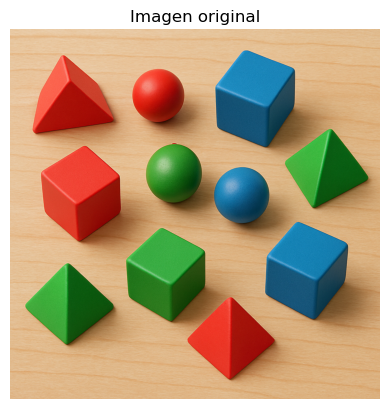

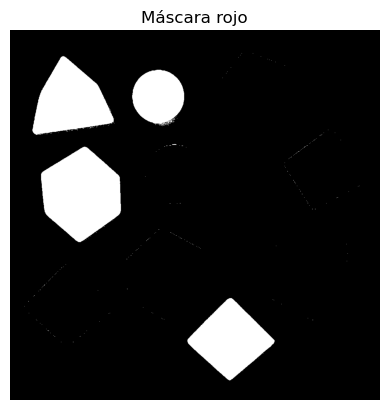

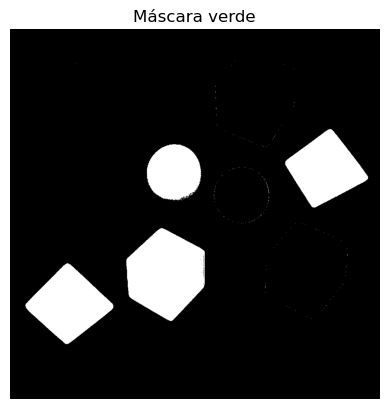

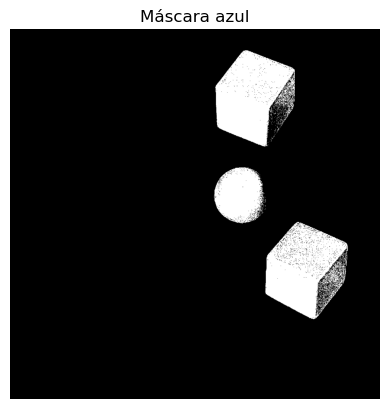

In [3]:
from skimage import io, color, measure, morphology
import numpy as np
import matplotlib.pyplot as plt

def detectar_objetos_por_color(imagen):
    """
    Detecta y clasifica objetos por color (rojo, azul, verde)
    Retorna: diccionario con cantidad y centroides por color
    """
    hsv = color.rgb2hsv(imagen)
    resultados = {}

    # Definir rangos HSV para cada color
    # Rojo (dos rangos por el ciclo de matiz)
    mask_rojo1 = (hsv[:,:,0] < 0.05) & (hsv[:,:,1] > 0.5) & (hsv[:,:,2] > 0.2)
    mask_rojo2 = (hsv[:,:,0] > 0.95) & (hsv[:,:,1] > 0.5) & (hsv[:,:,2] > 0.2)
    mask_rojo = mask_rojo1 | mask_rojo2

    # Verde
    mask_verde = (hsv[:,:,0] > 0.25) & (hsv[:,:,0] < 0.45) & (hsv[:,:,1] > 0.5) & (hsv[:,:,2] > 0.2)

    # Azul
    mask_azul = (hsv[:,:,0] > 0.55) & (hsv[:,:,0] < 0.75) & (hsv[:,:,1] > 0.5) & (hsv[:,:,2] > 0.2)

    colores = {'rojo': mask_rojo, 'verde': mask_verde, 'azul': mask_azul}
    for color_nombre, mask in colores.items():
        # Limpiar máscara
        mask_clean = morphology.remove_small_objects(mask, min_size=100)
        label_img = measure.label(mask_clean)
        regiones = measure.regionprops(label_img)
        resultados[color_nombre] = {
            'cantidad': len(regiones),
            'centroides': [r.centroid for r in regiones]
        }

    return resultados

# Cargar imagen de prueba
imagen = io.imread('Imagen_4.png')

# Detectar objetos por color
resultados = detectar_objetos_por_color(imagen)

# Mostrar resultados
print("Resultados de clasificación por color:")
for color_nombre, info in resultados.items():
    print(f"{color_nombre.capitalize()}: {info['cantidad']} objetos")
    for i, centroide in enumerate(info['centroides']):
        print(f"  - Centroide {i+1}: {centroide}")

# Visualización
plt.imshow(imagen)
plt.title('Imagen original')
plt.axis('off')
plt.show()

for color_nombre, mask in zip(['rojo','verde','azul'], [
    (color.rgb2hsv(imagen)[:,:,0] < 0.05) | (color.rgb2hsv(imagen)[:,:,0] > 0.95),
    (color.rgb2hsv(imagen)[:,:,0] > 0.25) & (color.rgb2hsv(imagen)[:,:,0] < 0.45),
    (color.rgb2hsv(imagen)[:,:,0] > 0.55) & (color.rgb2hsv(imagen)[:,:,0] < 0.75)
]):
    plt.figure()
    plt.imshow(mask, cmap='gray')
    plt.title(f'Máscara {color_nombre}')
    plt.axis('off')
plt.show()

## Ejercicio 2: Navegación por Líneas (Seguimiento de Trayectoria)

**Escenario**: Un robot móvil debe seguir una línea en el suelo para navegar.

**Tareas**:

1. Detecta líneas usando la transformada de Hough
2. Calcula el ángulo de la línea principal
3. Determina si el robot debe girar izquierda/derecha
4. Estima la distancia al centro de la línea

```python
def seguir_linea(imagen):
    """
    Procesa imagen para seguimiento de línea
    Retorna: ángulo_giro, distancia_centro
    """
    # Preprocesamiento
    gray = rgb2gray(imagen)

    # Detección de bordes
    edges = canny(gray, sigma=2, low_threshold=0.1, high_threshold=0.2)

    # Tu código para Hough Transform aquí

    return angulo_giro, distancia_centro
```

**Reto adicional**: Maneja intersecciones y bifurcaciones.

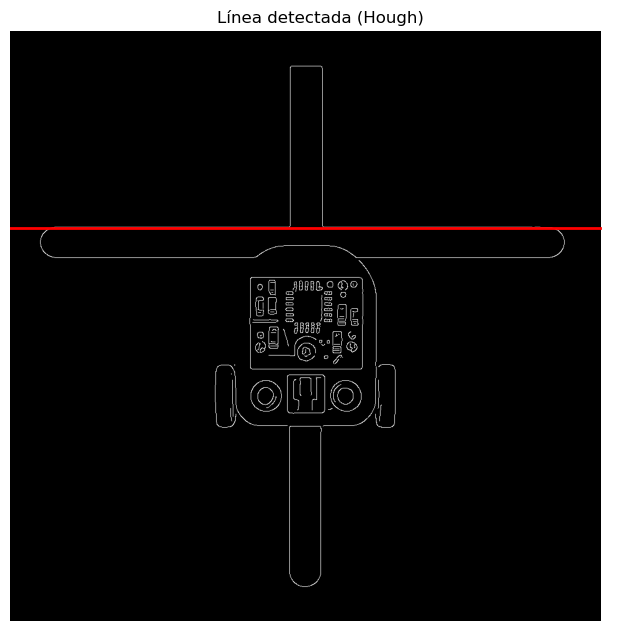

Ángulo de giro: -180.00°
Distancia al centro: 2792641929396407808.00 px


(np.float64(-180.0), np.float64(2.792641929396408e+18))

In [9]:
from skimage import io
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks
import numpy as np
import matplotlib.pyplot as plt

def seguir_linea(imagen):
    """
    Procesa imagen para seguimiento de línea
    Retorna: ángulo_giro, distancia_centro
    """
    # Preprocesamiento
    gray = rgb2gray(imagen)

    # Detección de bordes
    edges = canny(gray, sigma=2, low_threshold=0.1, high_threshold=0.2)

    # Transformada de Hough para líneas
    hspace, angles, dists = hough_line(edges)
    accums, thetas, rhos = hough_line_peaks(hspace, angles, dists, num_peaks=1)

    if len(thetas) == 0:
        # No se detectó línea
        angulo_giro = 0
        distancia_centro = 0
        print("No se detectó línea.")
        return angulo_giro, distancia_centro

    # Selecciona la línea principal
    theta = thetas[0]
    rho = rhos[0]

    # Calcula el ángulo de la línea respecto a la vertical (en grados)
    angulo_giro = np.rad2deg(theta) - 90  # 0 = vertical, negativo = izquierda, positivo = derecha

    # Estima la distancia al centro de la imagen (en píxeles)
    h, w = gray.shape
    y_centro = h // 2
    if np.cos(theta) != 0:
        x_linea = (rho - y_centro * np.sin(theta)) / np.cos(theta)
    else:
        x_linea = w // 2  # Si la línea es vertical

    distancia_centro = x_linea - (w // 2)  # Positivo = derecha, negativo = izquierda

    # Visualización
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(edges, cmap='gray')
    ax.set_title('Línea detectada (Hough)')
    ax.axis('off')

    # Dibuja la línea principal
    y0 = (rho - 0 * np.cos(theta)) / np.sin(theta)
    y1 = (rho - w * np.cos(theta)) / np.sin(theta)
    ax.plot((0, w), (y0, y1), '-r', linewidth=2)
    plt.show()

    print(f"Ángulo de giro: {angulo_giro:.2f}°")
    print(f"Distancia al centro: {distancia_centro:.2f} px")

    return angulo_giro, distancia_centro

# Ejemplo de uso:
imagen = io.imread('Imagen_1.png')
seguir_linea(imagen)

## Ejercicio 3: Detección y Medición de Objetos (Control de Calidad)

**Escenario**: Un robot industrial debe medir dimensiones de piezas manufacturadas.

**Tareas**:

1. Segmenta objetos del fondo
2. Calcula área, perímetro y dimensiones principales
3. Detecta defectos (agujeros, irregularidades)
4. Clasifica piezas como "aprobadas" o "defectuosas"

```python
def control_calidad(imagen, tolerancia_area=0.1):
    """
    Analiza piezas para control de calidad
    """
    # Segmentación
    gray = rgb2gray(imagen)
    thresh = filters.threshold_otsu(gray)
    binary = gray > thresh

    # Análisis morfológico
    cleaned = morphology.remove_small_objects(binary, min_size=100)

    # Tu código para mediciones aquí

    return resultados_medicion
```

**Métricas a calcular**:

- Área en píxeles y mm²
- Relación aspecto (largo/ancho)
- Circularidad: 4π×área/perímetro²
- Número de agujeros

---

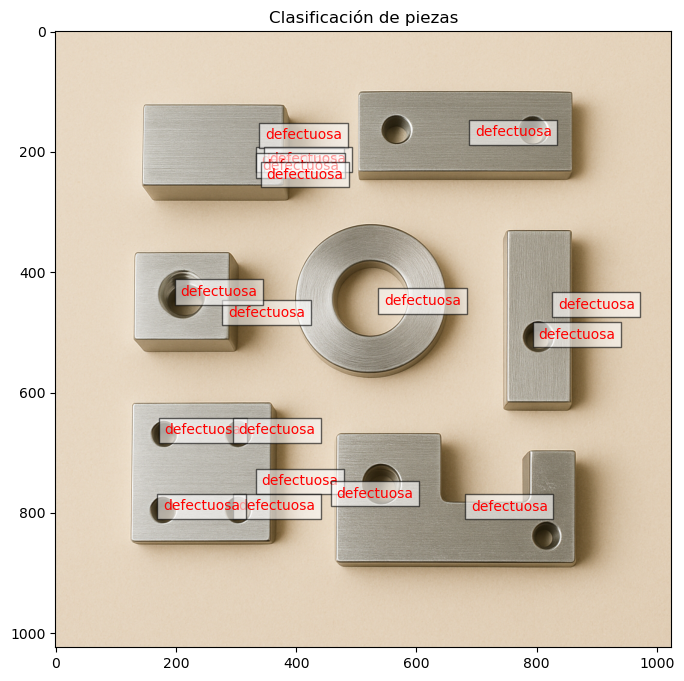

{'total': 18, 'aprobadas': 0, 'defectuosas': 18}
{'label': 1, 'area_px': 54358, 'area_mm2': 135.89500000000004, 'perimetro_px': 2341.7564927611033, 'largo_px': 431.3749537724358, 'ancho_px': 169.26054621081028, 'relacion_aspecto': 2.548585381705952, 'circularidad': 0.1245632317340705, 'agujeros': 3, 'solidez': 0.96550621669627, 'clasificacion': 'defectuosa', 'razones': ['Agujeros: 3', 'Circularidad baja (0.125)', 'Área fuera de tolerancia (13.2%)']}
{'label': 2, 'area_px': 18384, 'area_mm2': 45.96000000000001, 'perimetro_px': 2619.117928474841, 'largo_px': 310.64414081645094, 'ancho_px': 177.73520020495758, 'relacion_aspecto': 1.7477918862342843, 'circularidad': 0.033677494084626426, 'agujeros': 0, 'solidez': 0.4053624977950256, 'clasificacion': 'defectuosa', 'razones': ['Solidez baja (0.405)', 'Circularidad baja (0.034)', 'Área fuera de tolerancia (61.7%)']}
{'label': 3, 'area_px': 166, 'area_mm2': 0.4150000000000001, 'perimetro_px': 118.94112549695429, 'largo_px': 59.263089017662764,

In [3]:
from skimage import io, filters, measure, morphology
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

def control_calidad(
    imagen,
    tolerancia_area=0.10,
    mm_por_pixel=1.0,
    area_ref_mm2=None,
    circularidad_min=None,
    solidez_min=0.95,
    min_size_px=100,
    plot=False
):
    """
    Analiza piezas para control de calidad
    """

    # --- 1) SEGMENTACIÓN ---
    if imagen.ndim == 3:
        gray = rgb2gray(imagen)
    else:
        gray = imagen.astype(np.float32)
        gray = (gray - gray.min()) / (gray.ptp() + 1e-8)

    thresh = filters.threshold_otsu(gray)
    binary = gray > thresh

    if binary.mean() > 0.5:
        binary = ~binary

    cleaned = morphology.remove_small_objects(binary, min_size=min_size_px)
    cleaned = morphology.remove_small_holes(cleaned, area_threshold=min_size_px)

    label_img = measure.label(cleaned, connectivity=2)
    props = measure.regionprops(label_img)

    resultados_por_obj = []
    mm2_por_px = (mm_por_pixel ** 2)

    for r in props:
        area_px = r.area
        area_mm2 = area_px * mm2_por_px
        perimetro_px = r.perimeter if r.perimeter > 0 else measure.perimeter(r.image, neighbourhood=8)
        largo_px = r.major_axis_length or 0.0
        ancho_px = r.minor_axis_length or 0.0
        relacion_aspecto = (largo_px / ancho_px) if ancho_px > 0 else np.inf
        circularidad = (4.0 * np.pi * area_px) / (perimetro_px ** 2) if perimetro_px > 0 else 0.0
        agujeros = int(1 - r.euler_number)
        convex_area = r.convex_area if r.convex_area else area_px
        solidez = area_px / convex_area

        defect_reasons = []
        if agujeros > 0:
            defect_reasons.append(f"Agujeros: {agujeros}")
        if solidez < solidez_min:
            defect_reasons.append(f"Solidez baja ({solidez:.3f})")
        if circularidad_min and circularidad < circularidad_min:
            defect_reasons.append(f"Circularidad baja ({circularidad:.3f})")
        if area_ref_mm2:
            desvio_rel = abs(area_mm2 - area_ref_mm2) / area_ref_mm2
            if desvio_rel > tolerancia_area:
                defect_reasons.append(f"Área fuera de tolerancia ({desvio_rel*100:.1f}%)")

        clasificacion = "aprobada" if not defect_reasons else "defectuosa"

        resultados_por_obj.append({
            "label": int(r.label),
            "area_px": int(area_px),
            "area_mm2": float(area_mm2),
            "perimetro_px": float(perimetro_px),
            "largo_px": float(largo_px),
            "ancho_px": float(ancho_px),
            "relacion_aspecto": float(relacion_aspecto),
            "circularidad": float(circularidad),
            "agujeros": int(agujeros),
            "solidez": float(solidez),
            "clasificacion": clasificacion,
            "razones": defect_reasons
        })

    resumen = {
        "total": len(resultados_por_obj),
        "aprobadas": sum(1 for x in resultados_por_obj if x["clasificacion"] == "aprobada"),
        "defectuosas": sum(1 for x in resultados_por_obj if x["clasificacion"] == "defectuosa")
    }

    if plot:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.imshow(imagen, cmap="gray")
        for obj in resultados_por_obj:
            y, x = props[obj["label"] - 1].centroid
            ax.text(x, y, obj["clasificacion"], color="red", fontsize=10,
                    bbox=dict(facecolor="white", alpha=0.6))
        ax.set_title("Clasificación de piezas")
        plt.show()

    return {"por_objeto": resultados_por_obj, "resumen": resumen}


# ===============================
# EJEMPLO DE USO
# ===============================

# 1) Cargar la imagen con io.imread
imagen = io.imread("Imagen_5.png")  # <-- Cambia a tu ruta de imagen

# 2) Ejecutar el análisis
res = control_calidad(
    imagen,
    tolerancia_area=0.1,
    mm_por_pixel=0.05,
    solidez_min=0.95,
    circularidad_min=0.85,
    area_ref_mm2=120,
    plot=True
)

# 3) Mostrar resultados en consola
print(res["resumen"])
for obj in res["por_objeto"]:
    print(obj)


## Ejercicio 4: Reconocimiento de Formas Geométricas

**Escenario**: Un robot debe clasificar y manipular objetos según su forma.

**Tareas**:

1. Detecta contornos de objetos
2. Clasifica formas: círculo, cuadrado, triángulo, rectángulo
3. Calcula orientación para agarre robótico
4. Determina puntos de agarre óptimos

```python
def clasificar_formas(imagen):
    """
    Clasifica objetos por su forma geométrica
    """
    # Detección de contornos
    gray = rgb2gray(imagen)
    edges = canny(gray, sigma=1)

    # Análisis de forma
    contours = measure.find_contours(edges, 0.5)

    formas_detectadas = []

    for contour in contours:
        # Tu código para clasificación aquí
        # Usa aproximación poligonal, análisis de curvatura, etc.
        pass

    return formas_detectadas
```

**Algoritmos sugeridos**:

- Aproximación de Douglas-Peucker
- Análisis de momentos de Hu
- Descriptores de Fourier

---


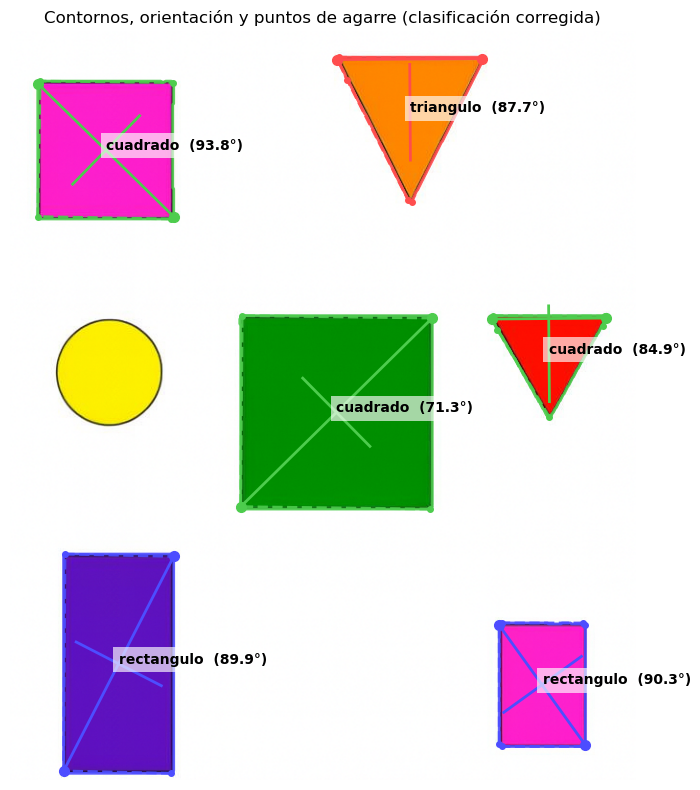

Imagen generada y guardada como: resultado_formas.png
[1]  triangulo  centroide=(84.02231404958678, 417.38677685950415)  θ=87.7°  agarre=((28.0, 492.5), (29.0, 341.5))
[2]   cuadrado  centroide=(123.37348353552859, 99.91507798960139)  θ=93.8°  agarre=((193.0, 170.5), (54.0, 28.5))
[3]   cuadrado  centroide=(397.3872366790582, 340.36183395291204)  θ=71.3°  agarre=((299.0, 440.5), (496.0, 240.5))
[4]   cuadrado  centroide=(336.25938189845476, 562.5209713024283)  θ=84.9°  agarre=((299.0, 622.5), (300.0, 502.5))
[5] rectangulo  centroide=(660.1632801161103, 113.07692307692308)  θ=89.9°  agarre=((548.0, 170.5), (772.0, 55.5))
[6] rectangulo  centroide=(681.6286681715576, 555.8216704288939)  θ=90.3°  agarre=((745.0, 600.5), (620.0, 510.5))


In [22]:
import numpy as np
from math import atan2, degrees
from dataclasses import dataclass
from typing import List, Tuple, Union, Dict, Any

import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology, measure, util

@dataclass
class FormaDetectada:
    etiqueta: str
    centroide: Tuple[float, float]
    orientacion_deg: float
    area: float
    perimetro: float
    bbox: Tuple[int, int, int, int]
    puntos_agarre: Tuple[Tuple[float,float], Tuple[float,float]]
    vertices: np.ndarray
    contorno: np.ndarray

# ---------- Utilidades de procesamiento ----------
def _cargar_imagen(img_arr: Union[str, np.ndarray]) -> np.ndarray:
    if isinstance(img_arr, str):
        img = io.imread(img_arr)
    else:
        img = img_arr
    if img.ndim == 3:
        if img.shape[2] == 4:  # Si tiene canal alfa
            img = color.rgba2rgb(img)
        img = color.rgb2gray(img)
    return util.img_as_float(img)

def _binzarizar(img_gray: np.ndarray) -> np.ndarray:
    img_blur = filters.median(img_gray, morphology.disk(3))
    thr = filters.threshold_otsu(img_blur)
    mask = img_blur < thr                 # cambia a > thr si tus objetos son claros
    mask = morphology.remove_small_objects(mask, min_size=200)
    mask = morphology.remove_small_holes(mask, area_threshold=200)
    mask = morphology.binary_closing(mask, morphology.disk(2))
    return mask

def _contornos_desde_mascara(mask: np.ndarray) -> List[np.ndarray]:
    return measure.find_contours(mask.astype(float), level=0.5)

def _aprox_poligono(contorno: np.ndarray, tolerancia: float) -> np.ndarray:
    poly = measure.approximate_polygon(contorno[:, [0,1]], tolerance=tolerancia)
    if len(poly) > 2 and np.allclose(poly[0], poly[-1]):
        poly = poly[:-1]
    return poly

def _circularidad(area: float, perimetro: float) -> float:
    if perimetro == 0:
        return 0.0
    return 4.0 * np.pi * area / (perimetro ** 2)

def _pca_orientacion_y_ejes(puntos: np.ndarray):
    # puntos (fila, col) -> (x,y)
    YX = np.stack([puntos[:,1], puntos[:,0]], axis=0)
    centro = YX.mean(axis=1, keepdims=True)
    Xc = YX - centro
    C = np.cov(Xc)
    evals, evecs = np.linalg.eigh(C)
    idx = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:, idx]
    return centro.flatten()[::-1], evecs, evals  # centro como (fila, col)

def _angulo_desde_evec(evec_mayor: np.ndarray) -> float:
    return degrees(atan2(evec_mayor[1], evec_mayor[0]))

def _puntos_agarre(contorno: np.ndarray, evecs: np.ndarray):
    eje_menor_xy = evecs[:, 1]  # contacto normal al eje mayor
    XY = np.stack([contorno[:,1], contorno[:,0]], axis=1)  # Nx2
    proy = XY @ eje_menor_xy
    i_min, i_max = np.argmin(proy), np.argmax(proy)
    p1_xy, p2_xy = XY[i_min], XY[i_max]
    p1 = (float(p1_xy[1]), float(p1_xy[0]))  # (fila, col)
    p2 = (float(p2_xy[1]), float(p2_xy[0]))
    return p1, p2

def _dist(a, b):
    return float(np.hypot(a[0]-b[0], a[1]-b[1]))

def _angulo(p_prev, p, p_next):
    # Ángulo interior en grados usando producto punto
    v1 = np.array([p_prev[0]-p[0], p_prev[1]-p[1]])
    v2 = np.array([p_next[0]-p[0], p_next[1]-p[1]])
    n1 = np.linalg.norm(v1) + 1e-9
    n2 = np.linalg.norm(v2) + 1e-9
    cosang = np.clip(np.dot(v1, v2)/(n1*n2), -1.0, 1.0)
    return np.degrees(np.arccos(cosang))

def _clasificar_figura(poly: np.ndarray,
                       area: float,
                       perimetro: float,
                       props_objeto,
                       pca_evals) -> str:
    n = len(poly)

    # Re-approx adaptativa si hay 5..8 vértices (mucho diente de sierra):
    if 5 <= n <= 8:
        tol_extra = max(5.0, 0.1 * np.sqrt(area))
        poly2 = _aprox_poligono(poly, tolerancia=tol_extra)
        if len(poly2) in (3, 4):
            poly = poly2
            n = len(poly)

    # Triángulo: exactamente 3 vértices y ángulos internos ~60°-75°
    if n == 3:
        pts = [(p[1], p[0]) for p in poly]
        angs = [
            _angulo(pts[-1], pts[0], pts[1]),
            _angulo(pts[0],  pts[1], pts[2]),
            _angulo(pts[1],  pts[2], pts[0]),
        ]
        if all(50 <= ang <= 80 for ang in angs):
            return "triangulo"

    # Cuadrado/Rectángulo: 4 vértices y ángulos internos ~90°
    if n == 4:
        pts = [(p[1], p[0]) for p in poly]
        a,b,c,d = pts[0], pts[1], pts[2], pts[3]
        angs = [
            _angulo(pts[-1], pts[0], pts[1]),
            _angulo(pts[0],  pts[1], pts[2]),
            _angulo(pts[1],  pts[2], pts[3]),
            _angulo(pts[2],  pts[3], pts[0]),
        ]
        es_recto = all(85 <= ang <= 95 for ang in angs)
        if es_recto:
            lados = [
                _dist(a,b), _dist(b,c), _dist(c,d), _dist(d,a)
            ]
            ratio = max(lados)/(min(lados)+1e-9)
            return "cuadrado" if ratio <= 1.15 else "rectangulo"

    # Circularidad
    circ = _circularidad(area, perimetro)
    if circ >= 0.85:
        if hasattr(props_objeto, "eccentricity"):
            if props_objeto.eccentricity <= 0.5:
                return "circulo"
        else:
            return "circulo"

    # Fallback por PCA
    if pca_evals is not None and pca_evals[1] > 0:
        axis_ratio = np.sqrt(pca_evals[0] / pca_evals[1])
        if 0.9 <= axis_ratio <= 1.2:
            return "cuadrado"
        if axis_ratio > 1.2:
            return "rectangulo"

    return "desconocido"

# ---------- Núcleo: clasificar y calcular agarres ----------
def clasificar_formas(imagen: Union[str, np.ndarray]) -> List[Dict[str, Any]]:
    gray = _cargar_imagen(imagen)
    mask = _binzarizar(gray)

    lbl = measure.label(mask)
    props = measure.regionprops(lbl)

    resultados: List[Dict[str, Any]] = []

    for r in props:
        if r.area < 200:
            continue

        objeto_mask = (lbl == r.label)
        contornos = _contornos_desde_mascara(objeto_mask)
        if not contornos:
            continue
        contorno = max(contornos, key=lambda c: c.shape[0])

        # Tolerancia base y polígono
        tol = max(2.0, 0.02 * np.sqrt(r.area))
        poly = _aprox_poligono(contorno, tolerancia=tol)

        perim = measure.perimeter(objeto_mask, neighborhood=8)
        area = float(r.area)
        centroide, evecs, evals = _pca_orientacion_y_ejes(contorno)
        ang_deg = _angulo_desde_evec(evecs[:, 0])
        etiqueta = _clasificar_figura(poly, area, perim, r, evals)
        p1, p2 = _puntos_agarre(contorno, evecs)

        resultados.append({
            "etiqueta": etiqueta,
            "centroide": (float(centroide[0]), float(centroide[1])),
            "orientacion_deg": float(ang_deg),
            "area": area,
            "perimetro": float(perim),
            "bbox": tuple(int(v) for v in r.bbox),
            "puntos_agarre": (p1, p2),
            "vertices": poly,
            "contorno": contorno,
        })

    return resultados

# ---------- Visualización y guardado ----------
def dibujar_resultados(imagen_rgb_ou_gray: np.ndarray,
                       resultados: List[Dict[str, Any]],
                       guardar_como: str = "resultado_formas.png") -> None:
    # Convertir a RGB si viene en gris
    if imagen_rgb_ou_gray.ndim == 2:
        base = np.dstack([imagen_rgb_ou_gray]*3)
    else:
        base = imagen_rgb_ou_gray.copy()
        if base.dtype != np.float64 and base.dtype != np.float32:
            base = util.img_as_float(base)

    # Colores por clase (opcional)
    colores = {
        "triangulo":  (1.0, 0.3, 0.3),
        "cuadrado":   (0.3, 0.8, 0.3),
        "rectangulo": (0.3, 0.3, 1.0),
        "circulo":    (1.0, 0.7, 0.2),
        "desconocido":(0.6, 0.6, 0.6),
    }

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(base)

    for f in resultados:
        cont = f["contorno"]
        poly = f["vertices"]
        c_row, c_col = f["centroide"]
        p1, p2 = f["puntos_agarre"]
        col = colores.get(f["etiqueta"], (0.6,0.6,0.6))

        # 1) Contorno
        ax.plot(cont[:,1], cont[:,0], '-', linewidth=2, alpha=0.9, color=col)

        # 2) Polígono aproximado (líneas y vértices)
        ax.plot(poly[:,1], poly[:,0], '--', linewidth=2, alpha=0.9, color=col)
        ax.plot(poly[:,1], poly[:,0], 'o', markersize=4, color=col)

        # 3) Eje mayor (aprox usando perpendicular a línea de agarre)
        v_menor = np.array([p2[1]-p1[1], p2[0]-p1[0]])  # (dx, dy)
        v_mayor = np.array([-v_menor[1], v_menor[0]])
        n = np.linalg.norm(v_mayor) + 1e-9
        v_mayor = v_mayor / n
        L = 50
        x_line = [c_col - L*v_mayor[0], c_col + L*v_mayor[0]]
        y_line = [c_row - L*v_mayor[1], c_row + L*v_mayor[1]]
        ax.plot(x_line, y_line, linewidth=2, color=col)

        # 4) Puntos de agarre y segmento
        ax.plot([p1[1], p2[1]], [p1[0], p2[0]], '-', linewidth=2, color=col)
        ax.plot([p1[1], p2[1]], [p1[0], p2[0]], 'o', markersize=7, color=col)

        # 5) Etiqueta y ángulo
        ax.text(c_col, c_row,
                f"{f['etiqueta']}  ({f['orientacion_deg']:.1f}°)",
                fontsize=10, weight='bold',
                color='black',
                bbox=dict(facecolor='white', alpha=0.65, edgecolor='none'))

    ax.set_title("Contornos, orientación y puntos de agarre (clasificación corregida)")
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(guardar_como, dpi=200, bbox_inches='tight')
    plt.show()
    print(f"Imagen generada y guardada como: {guardar_como}")

# ---------- Ejecución (misma carpeta) ----------
if __name__ == "__main__":
    imagen = io.imread('Imagen_6.png')   # cambia al nombre real en tu carpeta
    resultados = clasificar_formas(imagen)
    dibujar_resultados(imagen, resultados, guardar_como="resultado_formas.png")

    for i, f in enumerate(resultados, 1):
        print(f"[{i}] {f['etiqueta']:>10s}  "
              f"centroide={f['centroide']}  "
              f"θ={f['orientacion_deg']:.1f}°  "
              f"agarre={f['puntos_agarre']}")
